In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from data_loader import produce_dataset, get_dataloaders
from train import *
from test import *
from model_nn import Koopman
import numpy as np
import torch
initial_out = sys.stdout

## Dataset generation

In [2]:
# create dataset (optional)
x_range = np.array([0.1,0.1,0.1,0.5,0.5,1.5])
u_range = np.array([0.1,0.1,0.1])
SimLength=100
Ntraj = 200
Ts=0.01
path = produce_dataset(x_range,u_range,SimLength,Ntraj,Ts)
sys.stdout = initial_out
print(path)

 39%|███▉      | 47/120 [00:00<00:00, 234.53it/s]

Start simulating...


100%|██████████| 40/40 [00:00<00:00, 260.38it/s]


Dataset produced.
Dataset saved.
./dataset/x-[0.1 0.1 0.1 0.5 0.5 1.5]_u-[0.1 0.1 0.1]_1.0x200_Ts_0.01


## Model training

### Preparation

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from data_loader import produce_dataset, get_dataloaders
from train import *
from test import *
from model_nn import Koopman
import numpy as np
import torch
initial_out = sys.stdout
# get dataloaders
path = './dataset/x-[0.1 0.1 0.1 0.5 0.5 1.5]_u-[0.1 0.1 0.1]_1.0x200_Ts_0.01'
train_loader, val_loader, test_loader = get_dataloaders(path)
# trainers parameter setting
device = "cuda:0" if torch.cuda.is_available() else "cpu"

### Initial baseline - from paper

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 9: 100%|██████████| 120/120 [00:31<00:00,  3.83it/s, loss=1.322]


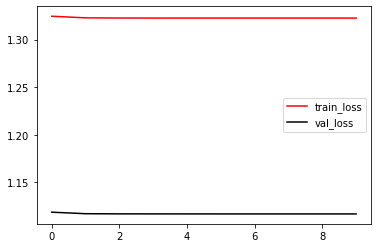

100%|██████████| 40/40 [00:03<00:00, 11.69it/s]


Loss score: 1.1944572083652019.


In [2]:
# create trainer
model = Koopman(hidden_layer=2)
hyper = [1.0,1.0,0.3,0.000000001,0.000000001,0.000000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model, loss_function, train_loader, val_loader, hyper, hidden_layer = 2, epochs=10)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model, loss_function, file_name)

### Varying length

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:16<00:00,  7.10it/s, loss=1.218]


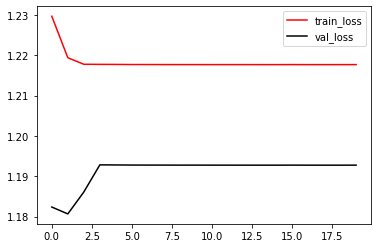

Loss score: 1.2493099546059967.


In [4]:
# create trainer
model1 = Koopman(hidden_layer=2)
hyper = [1.0,1.0,0.3,0.000000001,0.0000000001,0.000000001,20]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model1, loss_function, train_loader, val_loader, hyper, hidden_layer = 2, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model1, loss_function, file_name)

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:43<00:00,  2.77it/s, loss=1.224]


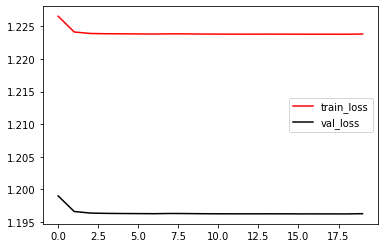

Loss score: 1.2576313875615597.


In [5]:
# create trainer
model2 = Koopman(hidden_layer=2)
hyper = [1.0,1.0,0.3,0.000000001,0.0000000001,0.000000001,60]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model2, loss_function, train_loader, val_loader, hyper, hidden_layer = 2, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model2, loss_function, file_name)

### Varing regularisation

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:30<00:00,  3.97it/s, loss=1.221]


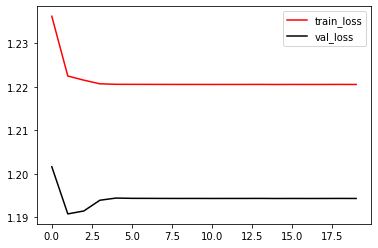

Loss score: 1.253273893939331.


In [8]:
# create trainer
model3 = Koopman(hidden_layer=2)
hyper = [1.0,1.0,0.3,0.0000000001,0.00000000001,0.0000000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model3, loss_function, train_loader, val_loader, hyper, hidden_layer = 2, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model3, loss_function, file_name)

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:29<00:00,  4.03it/s, loss=1.221]


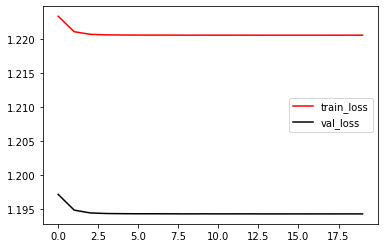

Loss score: 1.2532647669315338.


In [9]:
# create trainer
model4 = Koopman(hidden_layer=2)
hyper = [1.0,1.0,0.3,0.00000001,0.000000001,0.00000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model4, loss_function, train_loader, val_loader, hyper, hidden_layer = 2, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model4, loss_function, file_name)

### Varying different loss

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:29<00:00,  4.07it/s, loss=1.878]


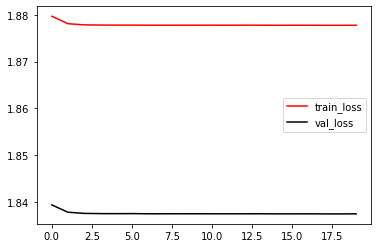

Loss score: 1.9281162098050117.


In [10]:
# create trainer
model5 = Koopman(hidden_layer=2)
hyper = [1.0,1.0,1.0,0.00000001,0.000000001,0.00000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model5, loss_function, train_loader, val_loader, hyper, hidden_layer = 2, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model5, loss_function, file_name)

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:30<00:00,  3.87it/s, loss=1.033]


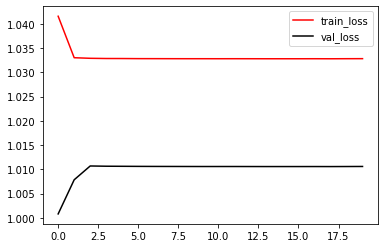

Loss score: 1.060486932238564.


In [11]:
# create trainer
model6 = Koopman(hidden_layer=2)
hyper = [1.0,1.0,0.1,0.00000001,0.000000001,0.00000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model6, loss_function, train_loader, val_loader, hyper, hidden_layer = 2, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model6, loss_function, file_name)

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:31<00:00,  3.83it/s, loss=0.751]


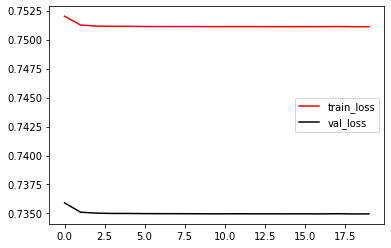

Loss score: 0.7712405268568545.


In [12]:
# create trainer
model7 = Koopman(hidden_layer=2)
hyper = [0.5,0.5,0.3,0.00000001,0.000000001,0.00000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model7, loss_function, train_loader, val_loader, hyper, hidden_layer = 2, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model7, loss_function, file_name)

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:31<00:00,  3.77it/s, loss=2.159]


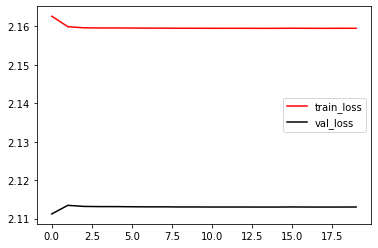

Loss score: 2.2173340413719416.


In [13]:
# create trainer
model8 = Koopman(hidden_layer=2)
hyper = [2.0,2.0,0.3,0.00000001,0.000000001,0.00000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model8, loss_function, train_loader, val_loader, hyper, hidden_layer = 2, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model8, loss_function, file_name)

### Change model structure

#### Varying lifted state

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:40<00:00,  3.00it/s, loss=1.221]


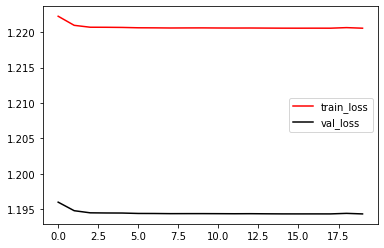

Loss score: 1.253275210876018.


In [3]:
# create trainer
model9 = Koopman(lifted_state = 60, hidden_out=30, hidden_layer=2)
hyper = [1.0,1.0,0.3,0.000000001,0.0000000001,0.000000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model9, loss_function, train_loader, val_loader, hyper, hidden_layer = 2, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model9, loss_function, file_name)

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:30<00:00,  3.99it/s, loss=1.221]


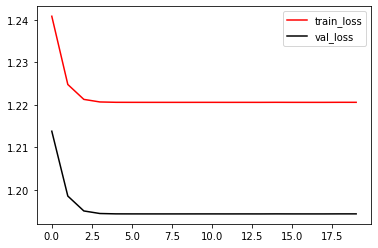

Loss score: 1.253266522102058.


In [6]:
# create trainer
model12 = Koopman(lifted_state = 10, hidden_out=30, hidden_layer=2)
hyper = [1.0,1.0,0.3,0.000000001,0.0000000001,0.000000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model12, loss_function, train_loader, val_loader, hyper, hidden_layer = 2, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model12, loss_function, file_name)

#### Varying hidden nodes

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:30<00:00,  3.99it/s, loss=1.221]


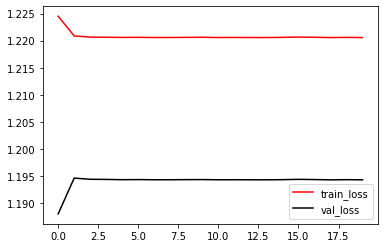

Loss score: 1.2532741925679147.


In [4]:
# create trainer
model10 = Koopman(lifted_state = 30, hidden_out=60, hidden_layer=2)
hyper = [1.0,1.0,0.3,0.000000001,0.0000000001,0.000000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model10, loss_function, train_loader, val_loader, hyper, hidden_layer = 2, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model10, loss_function, file_name)

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:29<00:00,  4.02it/s, loss=1.221]


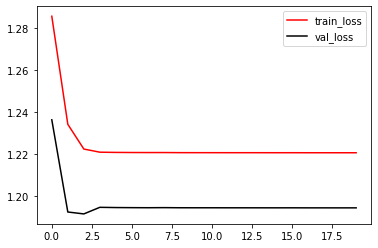

Loss score: 1.2532986899837852.


In [7]:
# create trainer
model13 = Koopman(lifted_state = 30, hidden_out=10, hidden_layer=2)
hyper = [1.0,1.0,0.3,0.000000001,0.0000000001,0.000000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model13, loss_function, train_loader, val_loader, hyper, hidden_layer = 2, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model13, loss_function, file_name)

#### Varying hidden layers

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:34<00:00,  3.46it/s, loss=1.221]


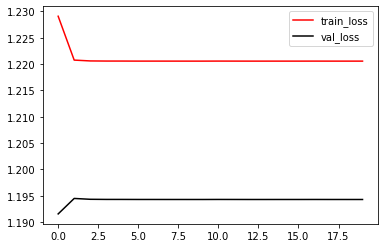

Loss score: 1.253255603229627.


In [14]:
# create trainer
model11 = Koopman(lifted_state = 30, hidden_out=30, hidden_layer=4)
hyper = [1.0,1.0,0.3,0.000000001,0.0000000001,0.000000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model11, loss_function, train_loader, val_loader, hyper, hidden_layer = 4, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model11, loss_function, file_name)

  0%|          | 0/120 [00:00<?, ?it/s]

Trainer created.


Epoch 19: 100%|██████████| 120/120 [00:27<00:00,  4.35it/s, loss=1.221]


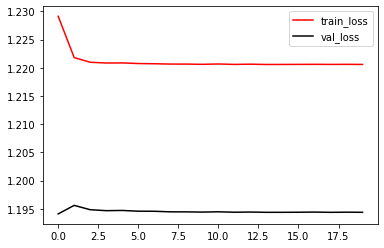

Loss score: 1.2533257271163165.


In [15]:
# create trainer
model14 = Koopman(lifted_state = 30, hidden_out=30, hidden_layer=1)
hyper = [1.0,1.0,0.3,0.000000001,0.0000000001,0.000000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
file_name = train_the_model(device, model14, loss_function, train_loader, val_loader, hyper, hidden_layer = 1, epochs=20)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, model14, loss_function, file_name)

## Result Analysis

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from data_loader import produce_dataset, get_dataloaders
from train import *
from test import *
from model_nn import Koopman
import numpy as np
import torch
initial_out = sys.stdout
# get dataloaders
path = './dataset/x-[0.1 0.1 0.1 0.5 0.5 1.5]_u-[0.1 0.1 0.1]_1.0x200_Ts_0.01'
train_loader, val_loader, test_loader = get_dataloaders(path)

# trainers parameter setting
device = "cuda:0" if torch.cuda.is_available() else "cpu"

torch.Size([100, 30])


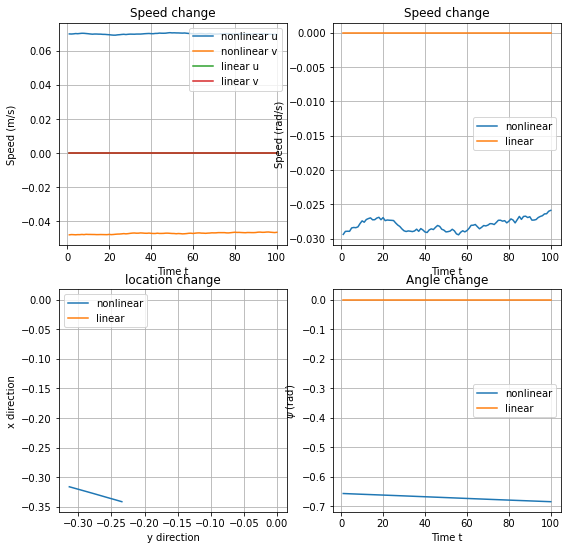

In [4]:
hyper = [1.0,1.0,0.3,0.000000001,0.0000000001,0.000000001,40]
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

hidden_layer = 1
lifted_state = 30
hidden_out = 30
model = Koopman(lifted_state = lifted_state, hidden_out=hidden_out, hidden_layer=hidden_layer)

file_name=f"hyper_{str(hyper)}_hidden_layer_{str(hidden_layer)}"

#plot_learning_curve(file_name)
#test_the_model(test_loader, model, loss_function, file_name)
result_sample(path,model,file_name,index=20)

In [8]:
index = 3
xx = np.load(path+"/X_test.npy")
uu = np.load(path+"/U_test.npy")
xx = xx[index]
uu = uu[index]
yy = xx[:-1]
print(xx.shape)
print(uu.shape)
print(yy.shape)

(101, 6)
(100, 3)
(100, 6)


In [3]:
for i, data in enumerate(test_loader):
    X, U=data
    X = X.to(device)
    U = U.to(device)
    loss = loss_function(model,X,U) 
print(U.shape)

torch.Size([1, 3, 100])


In [5]:
model = Koopman(hidden_layer=2)
submodules = []
for idx, m in enumerate(model.named_children()):
    submodules.append(m)
en = submodules[0][1]
de = submodules[1][1]
K = submodules[2][1]
print(en)

encoder(
  (input_layer): Sequential(
    (0): Linear(in_features=6, out_features=30, bias=True)
    (1): ReLU()
  )
  (hidden_layers): Sequential(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): ReLU()
  )
  (output_layer): Sequential(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): ReLU()
  )
)


In [9]:
print(torch.cuda.device_count())

1
